In [3]:
##Clustering the Restaurants

In [ ]:
##This notebook follows the following steps:

Step One: Install the required packages
Step Two: Load the required Data
Step Three: Create Maps
Step Four: Foursquare API Usage
Step Five: Data Extraction and Data Cleaning
Step Six: K Means Clustering

In [ ]:
##Step One: Install the required packages

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [5]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

Solving environment: done

# All requested packages already installed.



In [85]:
##Step Two: Load the Required Data

In [54]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_### = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='####',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_###.get_object(Bucket='geocodingaddresses-donotdelete-pr-d1zjgwq9rbmldy',Key='Top_Museums_Lat_Lng.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Name,Country Flag/City,Visitors per year,Year Reported,lat,long
0,Louvre,Paris,"10,200,000",2018,48.860611,2.337644
1,National Museum of China,Beijing,"8,610,092",2018,39.905094,116.401583
2,Metropolitan Museum of Art[b],New York City,"6,953,927",2018,40.779437,-73.963244
3,Vatican Museums,Vatican City,"6,756,186",2018,41.906488,12.453641
4,National Air and Space Museum,"Washington, D.C.","6,200,000",2018,38.888160,-77.019868


In [ ]:
##Step Three: Create Maps

In [71]:
df_data_1.head()

,Name,Country Flag/City,Visitors per year,Year Reported,lat,long
0,Louvre,Paris,"10,200,000",2018,48.860611,2.337644
1,National Museum of China,Beijing,"8,610,092",2018,39.905094,116.401583
2,Metropolitan Museum of Art[b],New York City,"6,953,927",2018,40.779437,-73.963244
3,Vatican Museums,Vatican City,"6,756,186",2018,41.906488,12.453641
4,National Air and Space Museum,"Washington, D.C.","6,200,000",2018,38.888160,-77.019868


In [66]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
lat = df_data_1['lat']
long = df_data_1['long']

In [80]:
address = 'Louvre'

# user_agent attribute is used just to remove the warning generated otherwise
geolocator = Nominatim(user_agent = 'my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("Latitude: {}, Longitude: {}".format(latitude, longitude))



Latitude: 48.8611473, Longitude: 2.33802768704666


In [84]:
map_mus = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, long, Name in zip(df_data_1['lat'], df_data_1['long'], df_data_1['Name']):
    label = '{}{}'.format('Name', 'Country Flag/City')
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat, long], 
    radius = 5, 
    popup = label, 
    color = 'blue', 
    fill = True, 
    fill_color = '#3186cc', 
    fill_opacity = 0.7).add_to(map_mus)
    
map_mus

In [8]:
df2 = df_data_1
df2
TopM_df = df_data_1

names=TopM_df['Name'],
latitudes=TopM_df['lat'],
longitudes=TopM_df['long']


In [ ]:
##Step Four: Foursquare API Usage

In [1]:
#Access to Foursquare

CLIENT_ID = '###' # your Foursquare ID
CLIENT_SECRET = '###' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ###
CLIENT_SECRET:###


In [9]:
Name_lat = df2.loc[0, 'lat'] # get latitude of first entry
Name_lng = df2.loc[0, 'long'] #get longitude of first entry
Name = df2.loc[0, 'Name']

print("Lat: {}, \nLong: {}, \nName: {}".format(Name_lat, 
                       Name_lng, 
                       Name))

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.
Lat: 48.860611, 
Long: 2.337644, 
Name: Louvre


In [ ]:
## For security purposes i Have removed the API keys. Please insert your API key for Four Square and run the following line of code 


LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Name_lat, 
    Name_lng, 
    radius,
    LIMIT)
url

In [11]:
TopM_results = requests.get(url).json() # Get the data in JSON format
TopM_results

{'meta': {'code': 200, 'requestId': '5db742ebcf72a0002ce0edbd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Paris',
  'headerFullLocation': 'Paris',
  'headerLocationGranularity': 'city',
  'totalResults': 100,
  'suggestedBounds': {'ne': {'lat': 48.8651110045, 'lng': 2.3444712523259836},
   'sw': {'lat': 48.856110995499996, 'lng': 2.3308167476740165}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c079d740ed3c928b6be797d',
       'name': 'Cour Carrée du Louvre',
       'location': {'address': 'Rue de Rivoli',
        'crossStreet': 'Place du Louvre',
        'lat': 48.8603598795578,
        'lng': 2.3385429382324214,
        'labeledLatLngs': [{'label': 'display',
        

In [12]:
def get_category_type(row):
    '''
    Helper code to get the category type
    '''
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
TopM_venues = TopM_results['response']['groups'][0]['items']
TopM_nearby = json_normalize(TopM_venues)
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
TopM_nearby = TopM_nearby.loc[:, filtered_columns]
TopM_nearby['venue.categories'] = TopM_nearby.apply(get_category_type, axis = 1)
TopM_nearby.columns = [col.split(".")[-1] for col in TopM_nearby.columns]
TopM_nearby.head()

,name,categories,lat,lng
0,Cour Carrée du Louvre,Pedestrian Plaza,48.860360,2.338543
1,Musée du Louvre,Art Museum,48.860847,2.336440
2,La Vénus de Milo (Vénus de Milo),Exhibit,48.859943,2.337234
3,Cour Napoléon,Plaza,48.861172,2.335088
4,Pont des Arts,Bridge,48.858565,2.337635


In [14]:
print(TopM_nearby.shape)


(100, 4)


In [15]:
print('There are {} uniques categories.'.format(len(TopM_nearby['categories'].unique())))

There are 47 uniques categories.


In [16]:
latitudes=TopM_nearby['lat']
longitudes=TopM_nearby['lng'] 

In [ ]:
##Step Five: Data Extraction and Data Cleaning


In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    '''
    This helper function returns the nearby venues
    '''
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Name Latitude', 
                  'Name Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
TopM_venues = getNearbyVenues(names=TopM_df['Name'],
                                   latitudes=TopM_df['lat'],
                                   longitudes=TopM_df['long']
                                  )

Louvre
National Museum of China
Metropolitan Museum of Art[b]
Vatican Museums
National Air and Space Museum
Tate Modern
British Museum
National Gallery
Natural History Museum
American Museum of Natural History
National Museum of Natural History
National Gallery of Art
China Science and Technology Museum
State Hermitage Museum
Zhejiang Museum
Victoria and Albert Museum
Reina Sofía
National Palace Museum[c]
National Museum of American History
Nanjing Museum
Hunan Museum
Centre Pompidou
Shanghai Science and Technology Museum
Gansu Provincial Museum
National Museum of Korea
London Science Museum
Musée d'Orsay
Somerset House
National Museum of Natural Science
Museo del Prado
Mevlana Museum
Shaanxi History Museum
Tokyo Metropolitan Art Museum
Chengdu Museum [zh]
Museum of Modern Art
National Art Center
National Museum of History
Royal Museums Greenwich
National Museum of Nature and Science
National Museum of Anthropology
NGV International
China Art Museum
California Science Center
Tokyo Nati

In [19]:
TopM_onehot = pd.get_dummies(TopM_venues[['Venue Category']], prefix = '', prefix_sep = "")

TopM_onehot['Name'] = TopM_venues['Name']

fixed_columns = [TopM_onehot.columns[-1]] + list(TopM_onehot.columns[:-1])
TopM_onehot = TopM_onehot[fixed_columns]

TopM_onehot.head()

,Name,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Canal,Canal Lock,Candy Store,Casino,Castle,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Football Field,College Quad,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run,Donut Shop,Drugstore,Dutch Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General College & University,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kaiseki Restaurant,Karaoke Bar,Kebab Restaurant,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Restaurant,River,Road,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Salsa Club,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Synagogue,Taco Place,Tailor Shop,Taiwanese

In [20]:
TopM_grouped = TopM_onehot.groupby('Name').mean().reset_index()
TopM_grouped.head()

,Name,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Canal,Canal Lock,Candy Store,Casino,Castle,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Football Field,College Quad,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run,Donut Shop,Drugstore,Dutch Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General College & University,General Entertainment,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kaiseki Restaurant,Karaoke Bar,Kebab Restaurant,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pharmacy,Photography Studio,Pide Place,Pie Shop,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Restaurant,River,Road,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Salsa Club,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Social Club,Soup Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Synagogue,Taco Place,Tailor Shop,Taiwanese

In [21]:
TopM_grouped_name = TopM_grouped['Name'] # Store the name column in a variable

In [22]:
TopM_grouped = TopM_grouped.loc[:, TopM_grouped.columns.str.endswith('Restaurant')]
TopM_grouped.head()

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dutch Restaurant,Eastern European Restaurant,English Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Okonomiyaki Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Scottish Restaurant,Seafood Restaurant,Soba Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Ukrainian Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yoshoku Restaurant
0,0.0,0.010000,0.0,0.0,0.010000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.02,0.0,0.01,0.040000,0.010000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.030000,0.020000,0.010000,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.000000,0.020000,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.020000,0.0,0.0,0.010000,0.0,0.0,0.00,0.0,0.0,0.010000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.111111,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.010000,0.0,0.0,0.000000,0.000000,0.020000,0.0,0.0,0.0,0.0,0.01,0.010000,0.01,0.0,0.02,0.0,0.0,0.01,0.0,0.00,0.000000,0.010000,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.010000,0.010000,0.000000,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.020000,0.010000,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.010000,0.0,0.0,0.010000,0.0,0.0,0.01,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.037037,0.0,0.0,0.037037,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.037037,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.018519,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.053191,0.0,0.0,0.010638,0.0,0.0,0.010638,0.010638,0.010638,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.031915,0.010638,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.010638,0.021277,0.010638,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.010638,0.010638,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.021277,0.0,0.0,0.010638,0.0,0.0,0.00,0.0,0.0,0.010638,0.0,0.0,0.0


In [23]:
# Add the name column
TopM_grouped['Name'] = TopM_grouped_name
TopM_grouped.head()

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dutch Restaurant,Eastern European Restaurant,English Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Okonomiyaki Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Scottish Restaurant,Seafood Restaurant,Soba Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Ukrainian Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yoshoku Restaurant,Name
0,0.0,0.010000,0.0,0.0,0.010000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.02,0.0,0.01,0.040000,0.010000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.030000,0.020000,0.010000,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.000000,0.020000,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.020000,0.0,0.0,0.010000,0.0,0.0,0.00,0.0,0.0,0.010000,0.0,0.0,0.0,American Museum of Natural History
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.111111,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,Auschwitz-Birkenau Memorial and Museum
2,0.0,0.000000,0.0,0.0,0.010000,0.0,0.0,0.000000,0.000000,0.020000,0.0,0.0,0.0,0.0,0.01,0.010000,0.01,0.0,0.02,0.0,0.0,0.01,0.0,0.00,0.000000,0.010000,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.010000,0.010000,0.000000,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.020000,0.010000,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.010000,0.0,0.0,0.010000,0.0,0.0,0.01,0.0,0.0,0.000000,0.0,0.0,0.0,British Museum
3,0.0,0.037037,0.0,0.0,0.037037,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.037037,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.018519,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,California Science Center
4,0.0,0.053191,0.0,0.0,0.010638,0.0,0.0,0.010638,0.010638,0.010638,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.031915,0.010638,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.010638,0.021277,0.010638,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.010638,0.010638,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.021277,0.0,0.0,0.010638,0.0,0.0,0.00,0.0,0.0,0.010638,0.0,0.0,0.0,Centre Pompidou


In [24]:

# Rearrange the name column to first
cols = list(TopM_grouped)
cols.insert(0, cols.pop(cols.index('Name')))
TopM_grouped = TopM_grouped.loc[:, cols]
TopM_grouped.head()

,Name,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dutch Restaurant,Eastern European Restaurant,English Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,North Indian Restaurant,Okonomiyaki Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Scottish Restaurant,Seafood Restaurant,Soba Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Ukrainian Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Yoshoku Restaurant
0,American Museum of Natural History,0.0,0.010000,0.0,0.0,0.010000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.02,0.0,0.01,0.040000,0.010000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.030000,0.020000,0.010000,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.000000,0.020000,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.020000,0.0,0.0,0.010000,0.0,0.0,0.00,0.0,0.0,0.010000,0.0,0.0,0.0
1,Auschwitz-Birkenau Memorial and Museum,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.111111,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
2,British Museum,0.0,0.000000,0.0,0.0,0.010000,0.0,0.0,0.000000,0.000000,0.020000,0.0,0.0,0.0,0.0,0.01,0.010000,0.01,0.0,0.02,0.0,0.0,0.01,0.0,0.00,0.000000,0.010000,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.010000,0.010000,0.000000,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.020000,0.010000,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.010000,0.0,0.0,0.010000,0.0,0.0,0.01,0.0,0.0,0.000000,0.0,0.0,0.0
3,California Science Center,0.0,0.037037,0.0,0.0,0.037037,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.037037,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.018519,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
4,Centre Pompidou,0.0,0.053191,0.0,0.0,0.010638,0.0,0.0,0.010638,0.010638,0.010638,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.031915,0.010638,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.010638,0.021277,0.010638,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.010638,0.010638,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.021277,0.0,0.0,0.010638,0.0,0.0,0.00,0.0,0.0,0.010638,0.0,0.0,0.0


In [25]:
num_top_venues = 10

for name in TopM_grouped['Name']:
    print('------- ' + name + ' -------')
    temp = TopM_grouped[TopM_grouped['Name'] == name].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

------- American Museum of Natural History -------
                       Venue  Frequency
0         Italian Restaurant       0.04
1   Mediterranean Restaurant       0.03
2         Mexican Restaurant       0.02
3                 Restaurant       0.02
4          Indian Restaurant       0.02
5           Sushi Restaurant       0.02
6            Thai Restaurant       0.01
7  Middle Eastern Restaurant       0.01
8        American Restaurant       0.01
9        Japanese Restaurant       0.01


------- Auschwitz-Birkenau Memorial and Museum -------
                             Venue  Frequency
0                       Restaurant       0.11
1               African Restaurant       0.00
2               Seafood Restaurant       0.00
3       Modern European Restaurant       0.00
4  Molecular Gastronomy Restaurant       0.00
5              Moroccan Restaurant       0.00
6          New American Restaurant       0.00
7          North Indian Restaurant       0.00
8           Okonomiyaki Restaurant    

                     Venue  Frequency
0  New American Restaurant       0.02
1     Brazilian Restaurant       0.02
2       Seafood Restaurant       0.02
3         Sushi Restaurant       0.02
4        French Restaurant       0.01
5  North Indian Restaurant       0.01
6       Mexican Restaurant       0.01
7      American Restaurant       0.01
8         Ramen Restaurant       0.01
9        Jewish Restaurant       0.01


------- Musée d'Orsay -------
                     Venue  Frequency
0        French Restaurant       0.23
1         Asian Restaurant       0.02
2               Restaurant       0.02
3       Italian Restaurant       0.02
4      Japanese Restaurant       0.02
5       Seafood Restaurant       0.02
6       African Restaurant       0.00
7         Ramen Restaurant       0.00
8  Scandinavian Restaurant       0.00
9       Russian Restaurant       0.00


------- NGV International -------
                    Venue  Frequency
0        Greek Restaurant       0.03
1   Australian Restaur

                   Venue  Frequency
0             Restaurant       0.05
1      Indian Restaurant       0.03
2     Seafood Restaurant       0.02
3    Japanese Restaurant       0.02
4     Italian Restaurant       0.02
5    Scottish Restaurant       0.02
6     English Restaurant       0.01
7     Mexican Restaurant       0.01
8    Lebanese Restaurant       0.01
9  Portuguese Restaurant       0.01


------- National Palace Museum[c] -------
                     Venue  Frequency
0       Chinese Restaurant       0.08
1     Taiwanese Restaurant       0.08
2       Dim Sum Restaurant       0.08
3       Seafood Restaurant       0.00
4  Scandinavian Restaurant       0.00
5       Russian Restaurant       0.00
6               Restaurant       0.00
7         Ramen Restaurant       0.00
8    Portuguese Restaurant       0.00
9       African Restaurant       0.00


------- Natural History Museum -------
                       Venue  Frequency
0         Italian Restaurant       0.04
1   Mediterranean Res

                           Venue  Frequency
0                     Restaurant       0.07
1             Russian Restaurant       0.02
2      Middle Eastern Restaurant       0.02
3  Vegetarian / Vegan Restaurant       0.02
4           Ukrainian Restaurant       0.02
5             Turkish Restaurant       0.02
6             Italian Restaurant       0.02
7    Eastern European Restaurant       0.02
8              Polish Restaurant       0.00
9               Ramen Restaurant       0.00


------- Van Gogh Museum -------
                             Venue  Frequency
0                       Restaurant       0.04
1                 Asian Restaurant       0.02
2               Seafood Restaurant       0.02
3                French Restaurant       0.02
4         Mediterranean Restaurant       0.01
5                 Theme Restaurant       0.01
6               Italian Restaurant       0.01
7            Indonesian Restaurant       0.01
8                 Sushi Restaurant       0.01
9  Molecular Gastronom

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
Museums_restaurants = pd.DataFrame(columns=columns)
Museums_restaurants['Name'] = TopM_grouped['Name']

for ind in np.arange(TopM_grouped.shape[0]):
    Museums_restaurants.iloc[ind, 1:] = return_most_common_venues(TopM_grouped.iloc[ind, :], num_top_venues)

Museums_restaurants

,Name,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,American Museum of Natural History,Italian Restaurant,Mediterranean Restaurant,Restaurant,Indian Restaurant,Sushi Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Seafood Restaurant,New American Restaurant,Israeli Restaurant
1,Auschwitz-Birkenau Memorial and Museum,Restaurant,Yoshoku Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Lebanese Restaurant
2,British Museum,Korean Restaurant,Chinese Restaurant,Greek Restaurant,Ramen Restaurant,Japanese Restaurant,Mexican Restaurant,Indian Restaurant,Okonomiyaki Restaurant,French Restaurant,Fast Food Restaurant
3,California Science Center,American Restaurant,Mexican Restaurant,Fast Food Restaurant,Asian Restaurant,Restaurant,Israeli Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant
4,Centre Pompidou,American Restaurant,Italian Restaurant,Mexican Restaurant,Sushi Restaurant,Mediterranean Restaurant,Brazilian Restaurant,Ramen Restaurant,Restaurant,Middle Eastern Restaurant,Chinese Restaurant
5,Chengdu Museum [zh],Chinese Restaurant,Yoshoku Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,French Restaurant
6,China Art Museum,Italian Restaurant,Seafood Restaurant,American Restaurant,Mexican Restaurant,New American Restaurant,Mediterranean Restaurant,Sushi Restaurant,Kosher Restaurant,Indian Restaurant,Restaurant
7,China Science and Technology Museum,Chinese Restaurant,Japanese Restaurant,Fast Food Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant
8,Cité des Sciences et de l'Industrie,French Restaurant,Japanese Restaurant,Asian Restaurant,Restaurant,Spanish Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Italian Restaurant,Fast Food Restaurant,African Restaurant
9,Donald W. Reynolds Center for American Art and...,Mediterranean Restaurant,American Restaurant,Mexican Restaurant,Tapas Restaurant,Ramen Restaurant,New American Restaurant,Seafood Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant


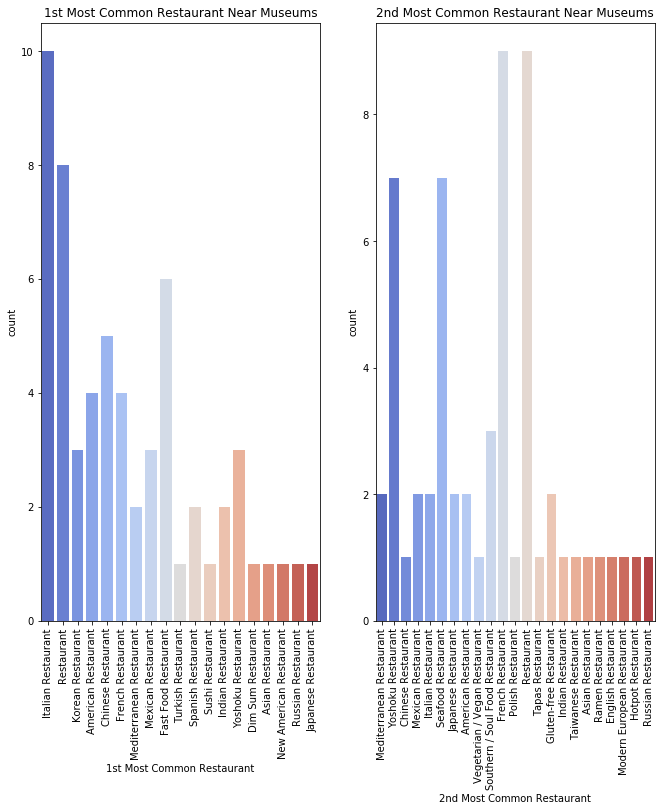

In [110]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 11))
ax1 = sns.countplot(x = '1st Most Common Restaurant', data = Museums_restaurants, 
                    palette = 'coolwarm', ax = ax1)
ax1.set_title('1st Most Common Restaurant Near Museums')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2 = sns.countplot(x = '2nd Most Common Restaurant', data = Museums_restaurants, 
                    palette = 'coolwarm', ax = ax2)
ax2.set_title('2nd Most Common Restaurant Near Museums')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

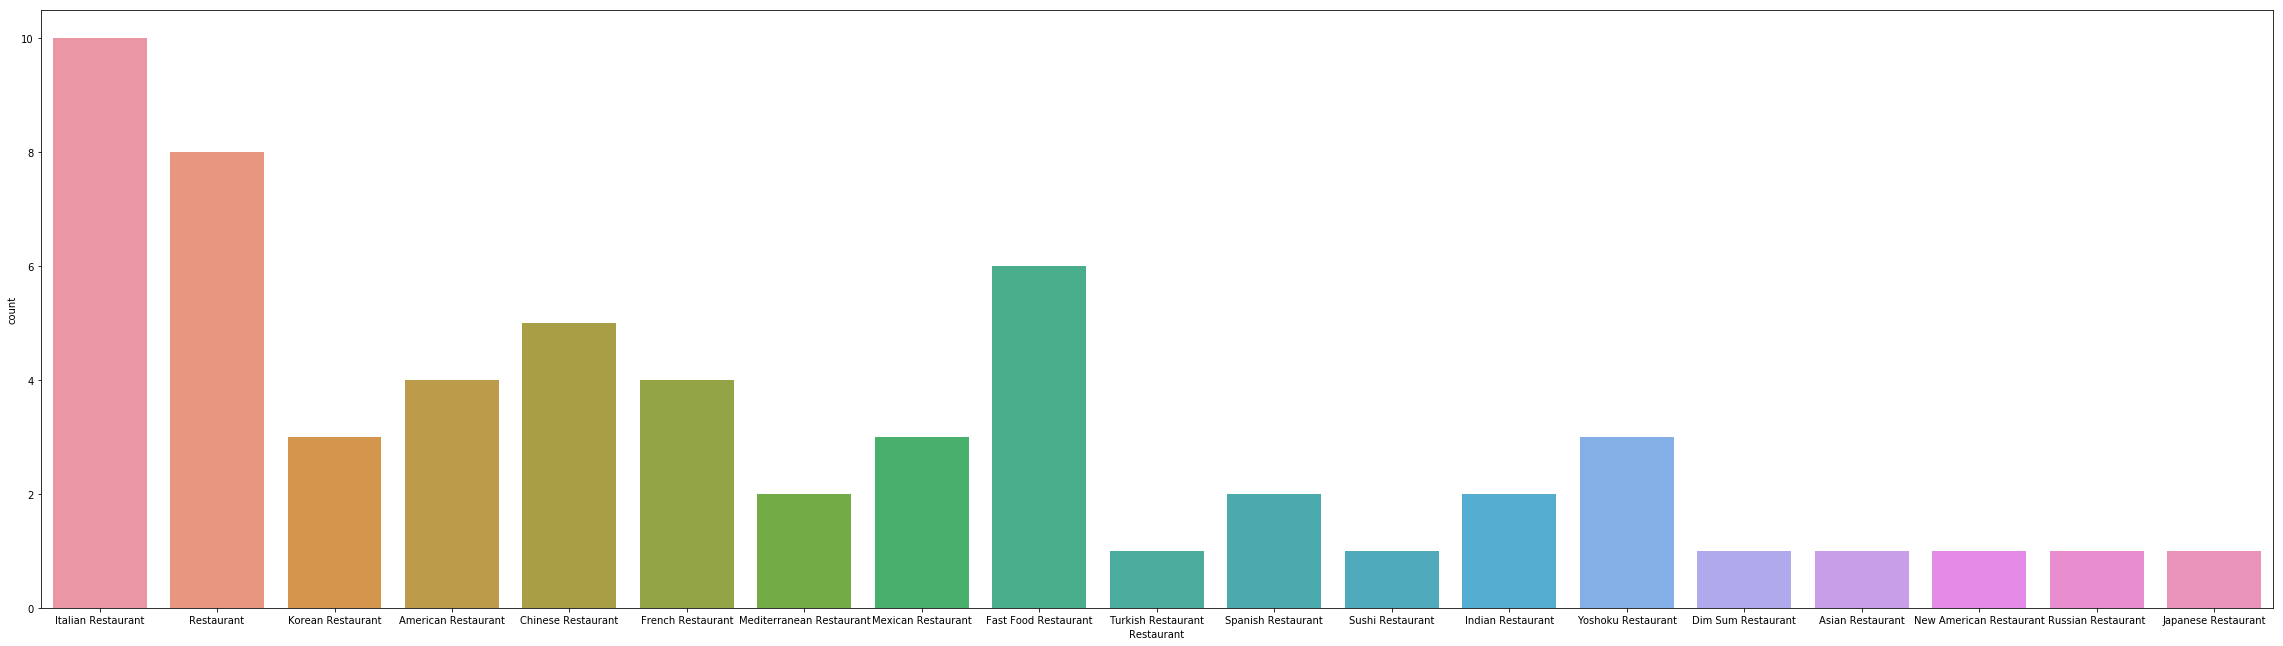

In [97]:
# countplot of 1st most common resturants by museum
fig, ax = plt.subplots(figsize=(40, 11))
sns.countplot(x='1st Most Common Restaurant', data=Museums_restaurants, ax=ax)
ax.set_xlabel('Restaurant');

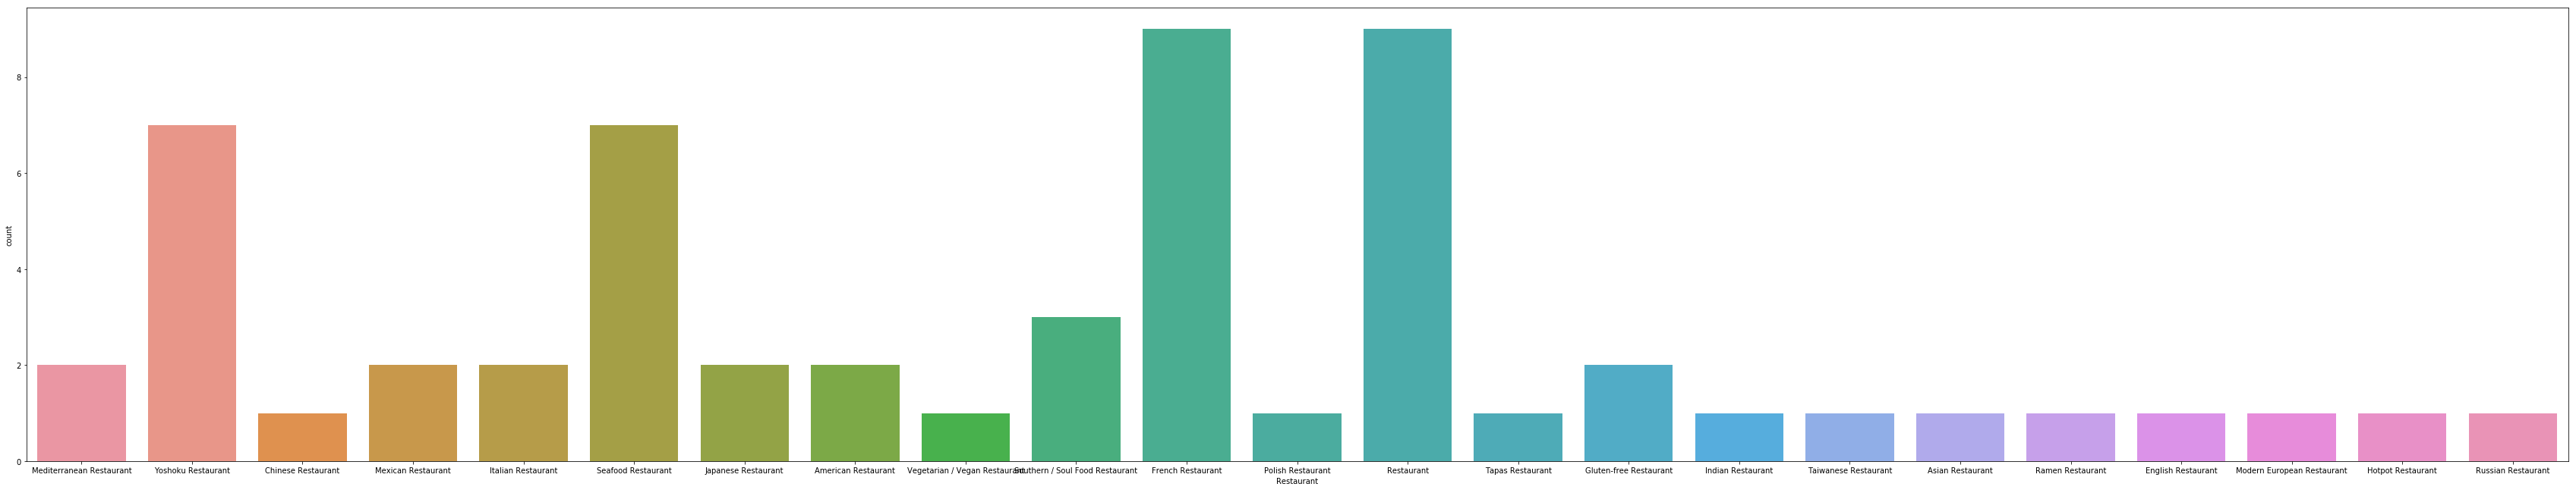

In [102]:
# countplot of 2nd most common resturants by museum
fig, ax = plt.subplots(figsize=(66, 11))
sns.countplot(x='2nd Most Common Restaurant', data=Museums_restaurants, ax=ax)
ax.set_xlabel('Restaurant');

In [28]:
Louvre = (Museums_restaurants.loc[Museums_restaurants['Name'] == 'Louvre']) 
Louvre

,Name,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
15,Louvre,French Restaurant,Restaurant,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant


In [29]:
National_Museum_China = (Museums_restaurants.loc[Museums_restaurants['Name'] == 'National Museum of China']) 
National_Museum_China

,Name,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
31,National Museum of China,Fast Food Restaurant,Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Yoshoku Restaurant,Gluten-free Restaurant


In [48]:
Metropolitan_Museum_Art = (Museums_restaurants.loc[Museums_restaurants['Name'] == 'Metropolitan Museum of Art[b]']) 
Metropolitan_Museum_Art

,Cluster Labels,Name,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
16,0,Metropolitan Museum of Art[b],Italian Restaurant,American Restaurant,Austrian Restaurant,Yoshoku Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Jewish Restaurant


In [31]:
Vatican_Museums= (Museums_restaurants.loc[Museums_restaurants['Name'] == 'Vatican Museums']) 
Vatican_Museums

,Name,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
56,Vatican Museums,Italian Restaurant,Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Yoshoku Restaurant,Lebanese Restaurant


In [32]:
National_Air_Space_Museum = (Museums_restaurants.loc[Museums_restaurants['Name'] == 'National Air and Space Museum']) 
National_Air_Space_Museum

,Name,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
23,National Air and Space Museum,Mediterranean Restaurant,French Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Jewish Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant


In [33]:
Tate_Modern = (Museums_restaurants.loc[Museums_restaurants['Name'] == 'Tate Modern']) 
Tate_Modern


,Name,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
50,Tate Modern,Italian Restaurant,Restaurant,Spanish Restaurant,Portuguese Restaurant,Ramen Restaurant,Asian Restaurant,Sushi Restaurant,Tapas Restaurant,Modern European Restaurant,Indian Restaurant


In [ ]:
##Step Six: K Means Clustering

In [34]:
kclusters = 5

Museums_restaurants_clustering = TopM_grouped.drop('Name', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Museums_restaurants_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 1, 0, 4, 0, 0, 0, 0, 4, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [35]:
# add clustering labels
Museums_restaurants.insert(0, 'Cluster Labels', kmeans.labels_)

TopM_merged = TopM_df

# merge topM_grouped with top museums to add latitude/longitude for each neighborhood
TopM_merged = TopM_merged.join(Museums_restaurants.set_index('Name'), on='Name')

TopM_merged.head() # check the last columns!

,Name,Country Flag/City,Visitors per year,Year Reported,lat,long,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Louvre,Paris,"10,200,000",2018,48.860611,2.337644,4,French Restaurant,Restaurant,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant
1,National Museum of China,Beijing,"8,610,092",2018,39.905094,116.401583,1,Fast Food Restaurant,Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Yoshoku Restaurant,Gluten-free Restaurant
2,Metropolitan Museum of Art[b],New York City,"6,953,927",2018,40.779437,-73.963244,0,Italian Restaurant,American Restaurant,Austrian Restaurant,Yoshoku Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Jewish Restaurant
3,Vatican Museums,Vatican City,"6,756,186",2018,41.906488,12.453641,0,Italian Restaurant,Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Yoshoku Restaurant,Lebanese Restaurant
4,National Air and Space Museum,"Washington, D.C.","6,200,000",2018,38.888160,-77.019868,0,Mediterranean Restaurant,French Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Jewish Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant


In [90]:
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 11)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(TopM_merged['lat'], TopM_merged['long'], TopM_merged['Name'], TopM_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [ ]:
 ##Cluster 1

In [45]:
TopM_merged.loc[TopM_merged['Cluster Labels'] == 0, TopM_merged.columns[[1] + list(range(5, TopM_merged.shape[1]))]]

,Country Flag/City,long,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
2,New York City,-73.963244,0,Italian Restaurant,American Restaurant,Austrian Restaurant,Yoshoku Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Jewish Restaurant
3,Vatican City,12.453641,0,Italian Restaurant,Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Yoshoku Restaurant,Lebanese Restaurant
4,"Washington, D.C.",-77.019868,0,Mediterranean Restaurant,French Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Jewish Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant
5,London,-0.099356,0,Italian Restaurant,Restaurant,Spanish Restaurant,Portuguese Restaurant,Ramen Restaurant,Asian Restaurant,Sushi Restaurant,Tapas Restaurant,Modern European Restaurant,Indian Restaurant
6,London,-0.126957,0,Korean Restaurant,Chinese Restaurant,Greek Restaurant,Ramen Restaurant,Japanese Restaurant,Mexican Restaurant,Indian Restaurant,Okonomiyaki Restaurant,French Restaurant,Fast Food Restaurant
7,London,-77.019965,0,Indian Restaurant,Gluten-free Restaurant,American Restaurant,Mexican Restaurant,Asian Restaurant,Peruvian Restaurant,New American Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant
8,London,-73.973988,0,Italian Restaurant,Mediterranean Restaurant,Restaurant,Indian Restaurant,Sushi Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Seafood Restaurant,New American Restaurant,Israeli Restaurant
9,New York City,-73.973988,0,Italian Restaurant,Mediterranean Restaurant,Restaurant,Indian Restaurant,Sushi Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Seafood Restaurant,New American Restaurant,Israeli Restaurant
10,"Washington, D.C.",-77.026065,0,American Restaurant,Restaurant,Indian Restaurant,Brazilian Restaurant,Yoshoku Restaurant,Italian Restaurant,Halal Restaurant,Hotpot Restaurant,Indonesian Restaurant,Israeli Restaurant
11,"Washington, D.C.",-77.019965,0,Indian Restaurant,Gluten-free Restaurant,American Restaurant,Mexican Restaurant,Asian Restaurant,Peruvian Restaurant,New American Restaurant,Italian Restaurant,Israeli Restaurant,Halal Restaurant


In [ ]:
##Cluster2

In [44]:
TopM_merged.loc[TopM_merged['Cluster Labels'] == 1, TopM_merged.columns[[1] + list(range(5, TopM_merged.shape[1]))]]

,Country Flag/City,long,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
1,Beijing,116.401583,1,Fast Food Restaurant,Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Yoshoku Restaurant,Gluten-free Restaurant
19,Nanjing,118.825424,1,Fast Food Restaurant,French Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Jewish Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant
20,Changsha,112.992122,1,Fast Food Restaurant,French Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Jewish Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant
22,Shanghai,121.541078,1,Fast Food Restaurant,Ramen Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Yoshoku Restaurant,Gluten-free Restaurant
31,Xi'an,108.955298,1,Fast Food Restaurant,French Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Jewish Restaurant,Japanese Restaurant,Italian Restaurant,Israeli Restaurant
50,Chongqing,106.550416,1,Fast Food Restaurant,Hotpot Restaurant,French Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Jewish Restaurant,Japanese Restaurant,Italian Restaurant


In [ ]:
##Cluster3

In [43]:
TopM_merged.loc[TopM_merged['Cluster Labels'] == 2, TopM_merged.columns[[1] + list(range(5, TopM_merged.shape[1]))]]

,Country Flag/City,long,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
23,Lanzhou,103.774664,2,Chinese Restaurant,Yoshoku Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,French Restaurant
33,Chengdu,104.044618,2,Chinese Restaurant,Yoshoku Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,French Restaurant


In [ ]:
##Cluster4

In [42]:
TopM_merged.loc[TopM_merged['Cluster Labels'] == 3, TopM_merged.columns[[1] + list(range(5, TopM_merged.shape[1]))]]

,Country Flag/City,long,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
12,Beijing,116.39864,3,Chinese Restaurant,Japanese Restaurant,Fast Food Restaurant,Israeli Restaurant,Greek Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant


In [ ]:
##Cluster5

In [41]:
TopM_merged.loc[TopM_merged['Cluster Labels'] == 4, TopM_merged.columns[[1] + list(range(5, TopM_merged.shape[1]))]]

,Country Flag/City,long,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Paris,2.337644,4,French Restaurant,Restaurant,Ramen Restaurant,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Indonesian Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant
26,Paris,2.326561,4,French Restaurant,Seafood Restaurant,Restaurant,Asian Restaurant,Japanese Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Greek Restaurant,Halal Restaurant
